In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data = pd.read_csv('Stars.csv')
print(data)

     Temperature              L          R    A_M  Color Spectral_Class  Type
0           3068       0.002400     0.1700  16.12    Red              M     0
1           3042       0.000500     0.1542  16.60    Red              M     0
2           2600       0.000300     0.1020  18.70    Red              M     0
3           2800       0.000200     0.1600  16.65    Red              M     0
4           1939       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235        38940  374830.000000  1356.0000  -9.93   Blue              O     5
236        30839  834042.000000  1194.0000 -10.63   Blue              O     5
237         8829  537493.000000  1423.0000 -10.73  White              A     5
238         9235  404940.000000  1112.0000 -11.23  White              A     5
239        37882  294903.000000  1783.0000  -7.80   Blue              O     5

[240 rows x 7 columns]


In [ ]:
le = LabelEncoder()
data['Color'] = le.fit_transform(data['Color'])
data['Spectral_Class']  =  le.fit_transform(data['Spectral_Class'])
X = data.drop('Type', axis=1)
y = data['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(data)

     Temperature              L          R    A_M  Color  Spectral_Class  Type
0           3068       0.002400     0.1700  16.12      8               5     0
1           3042       0.000500     0.1542  16.60      8               5     0
2           2600       0.000300     0.1020  18.70      8               5     0
3           2800       0.000200     0.1600  16.65      8               5     0
4           1939       0.000138     0.1030  20.06      8               5     0
..           ...            ...        ...    ...    ...             ...   ...
235        38940  374830.000000  1356.0000  -9.93      0               6     5
236        30839  834042.000000  1194.0000 -10.63      0               6     5
237         8829  537493.000000  1423.0000 -10.73      9               0     5
238         9235  404940.000000  1112.0000 -11.23      9               0     5
239        37882  294903.000000  1783.0000  -7.80      0               6     5

[240 rows x 7 columns]


In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9791666666666666


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_pred   =   knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("kNN Accuracy:", knn_accuracy)

kNN Accuracy: 0.6666666666666666


In [ ]:
log_reg_classifier  =  LogisticRegression(max_iter=10000)
log_reg_classifier.fit(X_train, y_train)
log_reg_pred  =  log_reg_classifier.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.9583333333333334


In [ ]:
dt_classifier  =  DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred  =  dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0


In [ ]:
rf_classifier  =  RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train,  y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report for Support Vector Machine (SVM):")
print(classification_report(y_test, svm_pred))

Classification Report for Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



In [ ]:
from sklearn.metrics import classification_report
print("\nClassification Report for k-Nearest Neighbors (kNN):")
print(classification_report(y_test, knn_pred))


Classification Report for k-Nearest Neighbors (kNN):
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.80      0.57      0.67         7
           2       0.86      1.00      0.92         6
           3       1.00      0.88      0.93         8
           4       0.33      0.38      0.35         8
           5       0.50      0.45      0.48        11

    accuracy                           0.67        48
   macro avg       0.70      0.69      0.69        48
weighted avg       0.68      0.67      0.67        48



In [ ]:
from sklearn.metrics import classification_report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test,  log_reg_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.86      0.86      0.86         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



In [ ]:
from sklearn.metrics import classification_report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [ ]:
from sklearn.metrics import classification_report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_pred))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



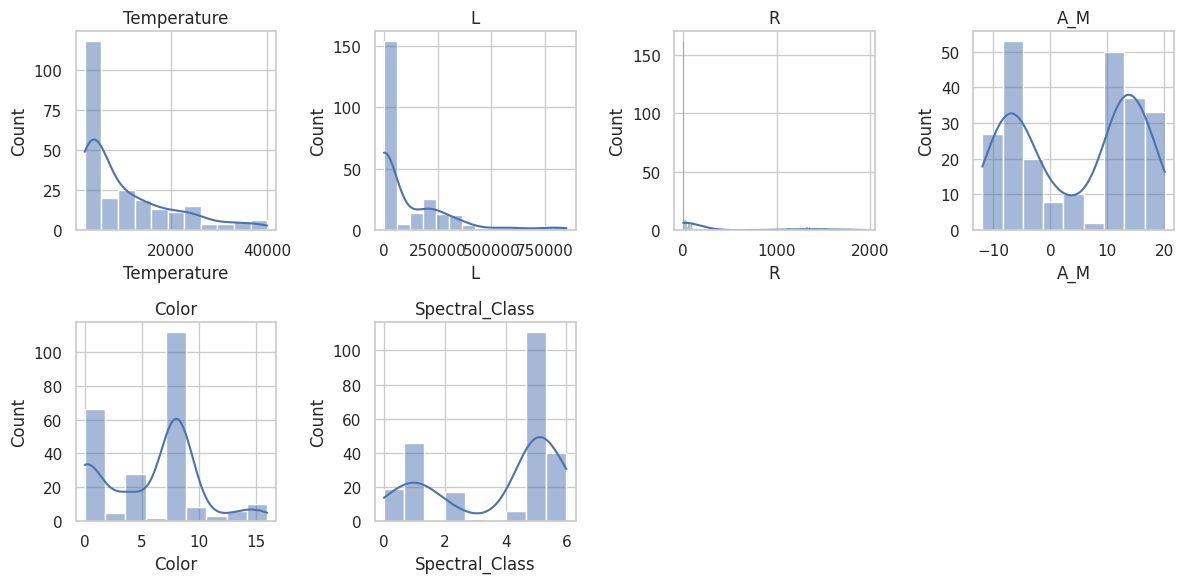

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
for i, column in enumerate(X.columns):
    plt.subplot(2, 4, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

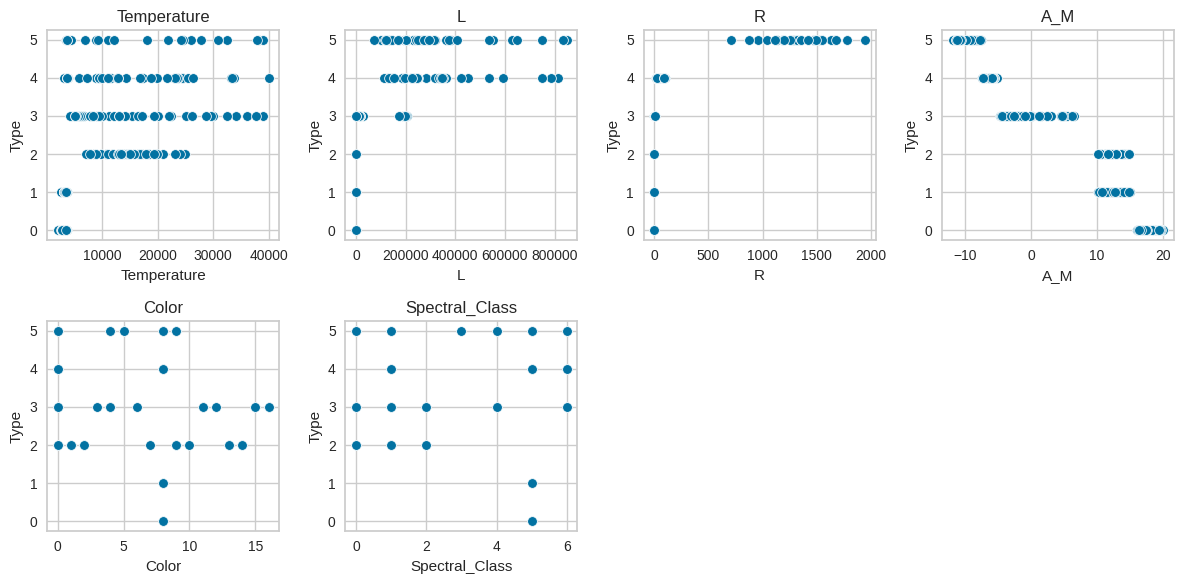

In [ ]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(X.columns):
    plt.subplot(2, 4, i+1)
    sns.scatterplot(x=column, y='Type', data=data)
    plt.title(column)
plt.tight_layout()
plt.show()


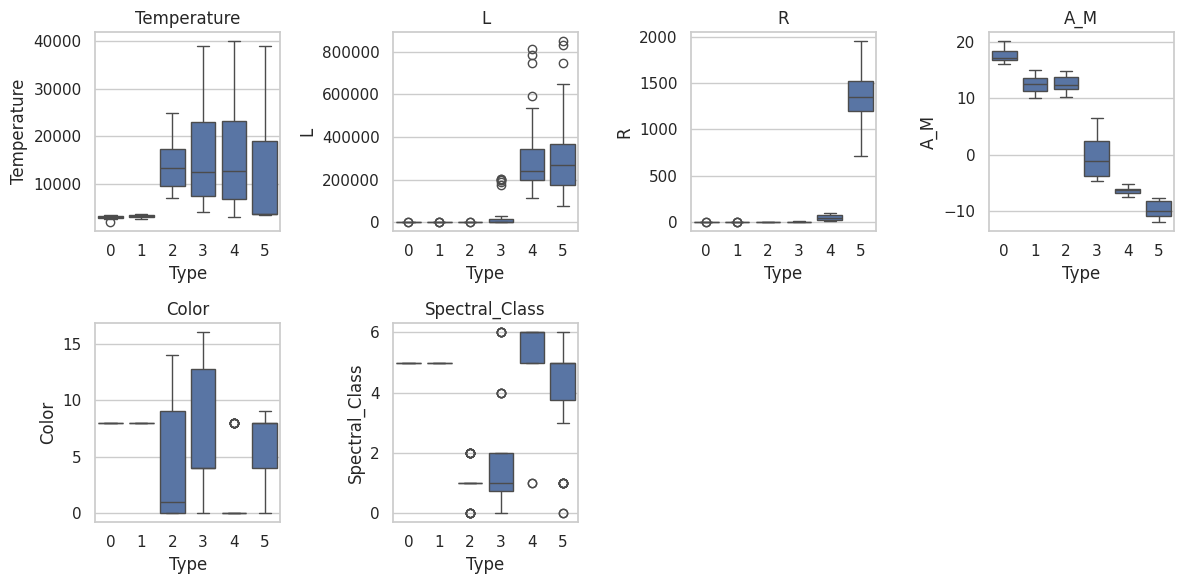

In [ ]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(X.columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='Type', y=column, data=data)
    plt.title(column)
plt.tight_layout()
plt.show()

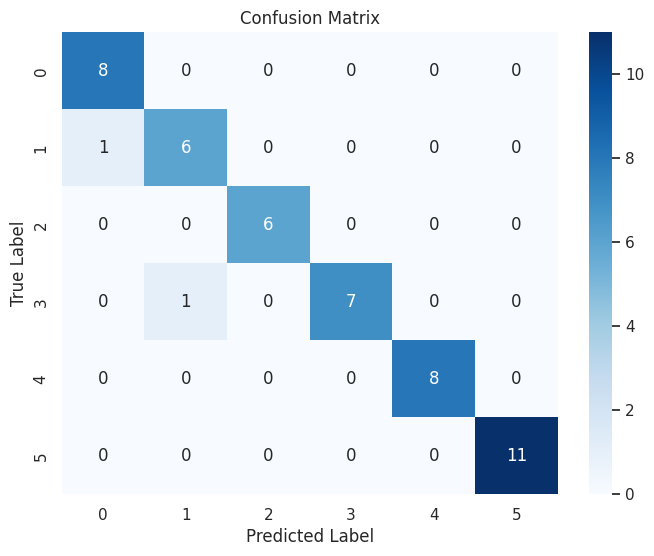

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, log_reg_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)


                Temperature         L         R       A_M     Color  \
Temperature        1.000000  0.393404  0.064216 -0.420261 -0.680107   
L                  0.393404  1.000000  0.526516 -0.692619 -0.379181   
R                  0.064216  0.526516  1.000000 -0.608728 -0.011242   
A_M               -0.420261 -0.692619 -0.608728  1.000000  0.328318   
Color             -0.680107 -0.379181 -0.011242  0.328318  1.000000   
Spectral_Class    -0.207852  0.275280  0.097124 -0.085840  0.018774   
Type               0.411129  0.676845  0.660975 -0.955276 -0.304993   

                Spectral_Class      Type  
Temperature          -0.207852  0.411129  
L                     0.275280  0.676845  
R                     0.097124  0.660975  
A_M                  -0.085840 -0.955276  
Color                 0.018774 -0.304993  
Spectral_Class        1.000000 -0.049131  
Type                 -0.049131  1.000000  


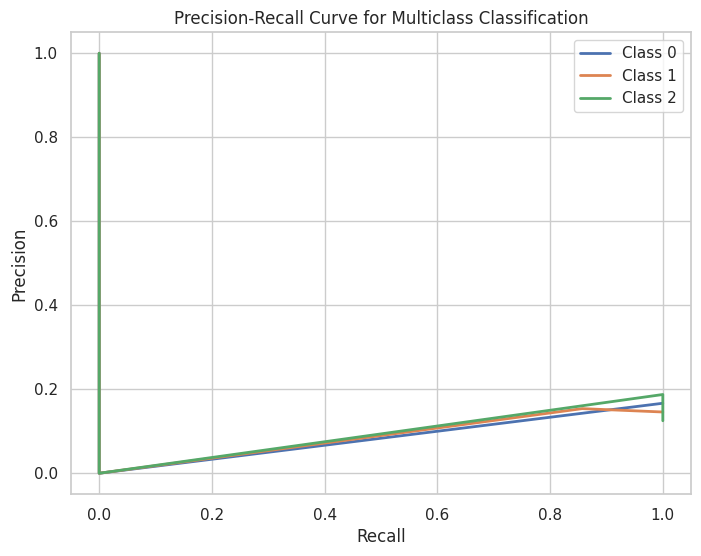

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_test, classes=[0, 1, 2])
precision = dict()
recall = dict()
plt.figure(figsize=(8, 6))
for i in range(y_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], log_reg_pred)
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multiclass Classification")
plt.legend(loc="best")
plt.show()


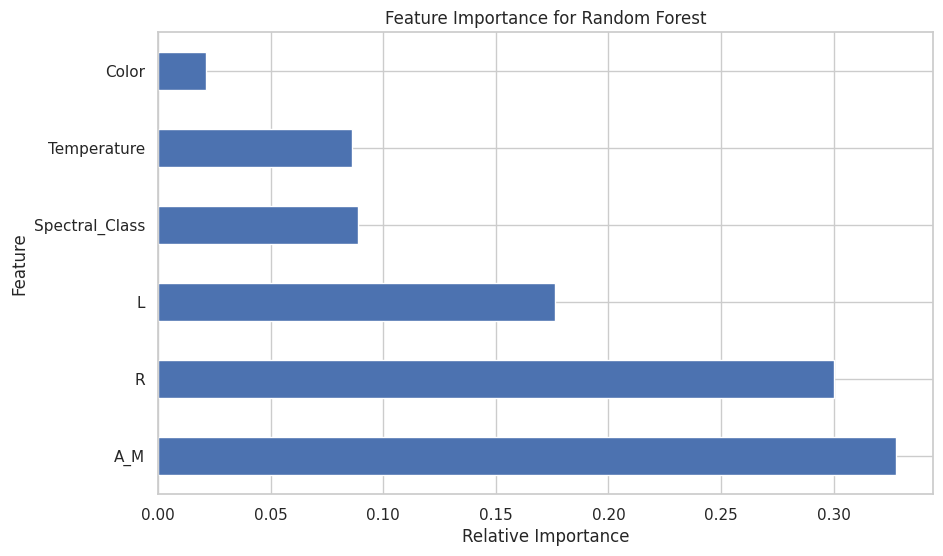

In [ ]:
plt.figure(figsize=(10,6))
feat_importances  =  pd.Series(rf_classifier.feature_importances_,  index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


<ipython-input-28-364c7d3961a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


Text(0, 0.5, 'Accuracy')

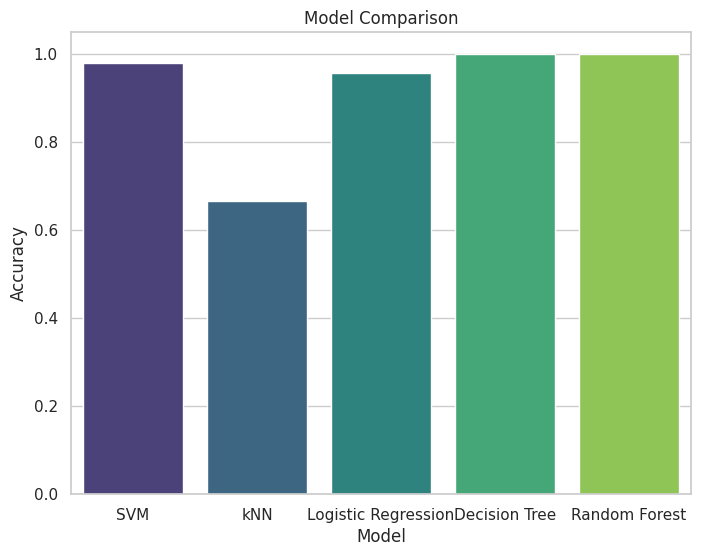

In [ ]:
models = ['SVM', 'kNN', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [svm_accuracy, knn_accuracy, log_reg_accuracy, dt_accuracy, rf_accuracy]
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')


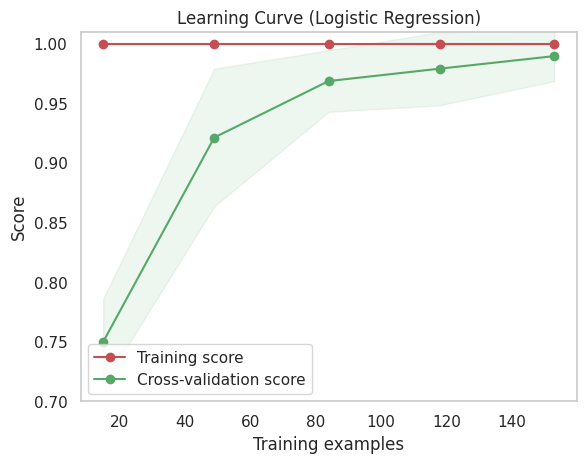

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt
plot_learning_curve(log_reg_classifier, "Learning Curve (Logistic Regression)", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
plt.show()


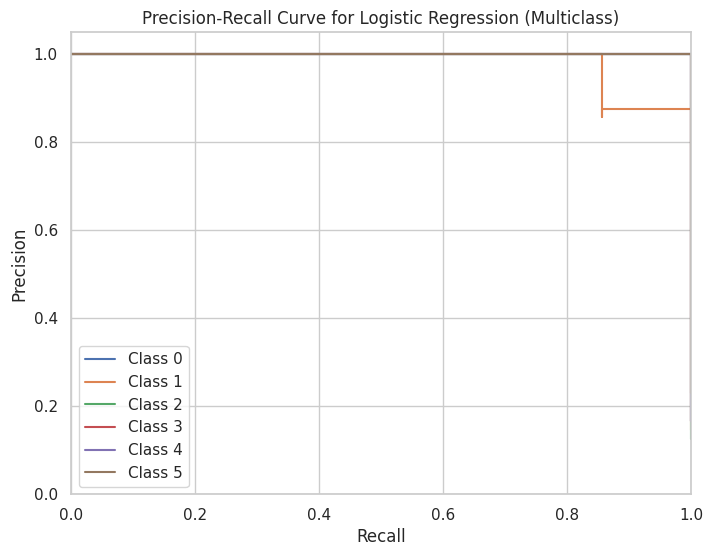

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=log_reg_classifier.classes_)
precision = dict()
recall = dict()
plt.figure(figsize=(8, 6))
for i in range(len(log_reg_classifier.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], log_reg_classifier.predict_proba(X_test)[:, i])
    plt.step(recall[i], precision[i], where='post', label='Class {0}'.format(i))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Logistic Regression (Multiclass)')
plt.legend(loc="best")
plt.show()


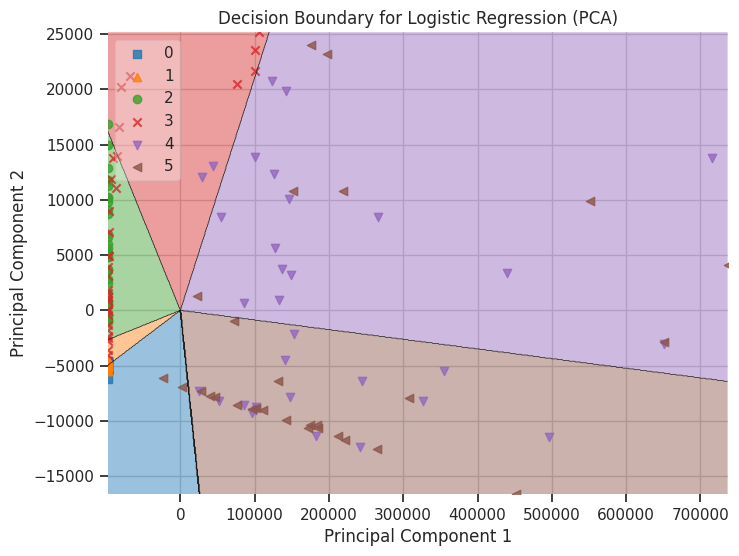

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

log_reg_classifier_pca = LogisticRegression(max_iter=1000)
log_reg_classifier_pca.fit(X_train_pca, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_train_pca,  y_train.values,  clf=log_reg_classifier_pca, legend=2, scatter_kwargs={'edgecolor': None})
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary for Logistic Regression (PCA)')
plt.show()


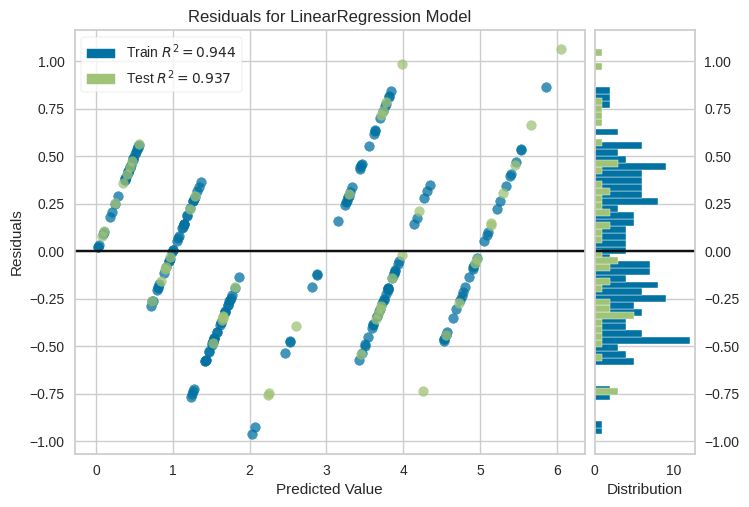

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

linear_regression = LinearRegression()

visualizer = ResidualsPlot(linear_regression)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9561


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
data = pd.read_csv('Stars.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9561
